<a href="https://colab.research.google.com/github/silviolima07/Pareto/blob/master/pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PARETO
## More than a century ago, Vifredo Pareto, a professor of Political Economy, published the results of his research on the distribution of wealth in society. 
## The dramatic inequalities he observed, e.g. 20% of the people owned 80% of the wealth, surprised economists, sociologists, and political scientists. Over the last century, several pioneers in varied fields observed this disproportionate distribution in several situations, including business.
## The theory that a vital few inputs/causes (e.g. 20% of inputs) directly influence a significant majority of the outputs/effects (e.g. 80% of outputs) came to be known as the Pareto Principle – also referred to as the 80-20 rule.

![alt text](https://drive.google.com/uc?id=1XUrGzPn8xZtVgBTLklPvpr-GBgIBRYIq)

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
#
import warnings
warnings.filterwarnings("ignore")

In [137]:
gdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/GDP(FMI).csv", encoding='ISO-8859-1', decimal=',')

In [138]:
gdp

,Ranking,Country,$$(Dollar Estimated)
0,1,Qatar,138.910
1,2,Luxembourg (EU),112.045
2,3,Singapore,105.689
3,4,Ireland (EU),86.988
4,5,Brunei,85.011
...,...,...,...
180,181,Niger,1.152
181,182,Eritrea,1.103
182,183,"Congo, Democratic Republic of the",873.000
183,184,Central African Republic,864.000


In [139]:
gdp185 = gdp.cumsum()
# Restaurar valores originais da coluna Country e $$
gdp185['Country'] = gdp['Country']
gdp185['Dollar Cummulated'] = gdp185['$$(Dollar Estimated)']
gdp185['Dollar Estimated'] = gdp['$$(Dollar Estimated)']

In [140]:
gdp185['GDP Percentual'] = gdp185['Dollar Cummulated']/gdp185['Dollar Cummulated'].max()
#
gdp185['GDP Percentual']= round(gdp185['GDP Percentual']*100,0).astype(int)

In [141]:
gdp185.columns

Index(['Ranking', 'Country', '$$(Dollar Estimated)', 'Dollar Cummulated',
       'Dollar Estimated', 'GDP Percentual'],
      dtype='object')

In [142]:
# Filtrando paises
# Baseado no GDP Percentual entre 185 ate 20%, representando os paises que somados o GDP acumulado somam até 20%
gdp20 = gdp185.loc[gdp185['GDP Percentual'] <=20]
gdp_filtrado = gdp20[['Ranking', 'Country', 'Dollar Cummulated',
       'Dollar Estimated', 'GDP Percentual']]


In [143]:
gdp_filtrado

,Ranking,Country,Dollar Cummulated,Dollar Estimated,GDP Percentual
0,1,Qatar,138.910,138.910,2
1,3,Luxembourg (EU),250.955,112.045,4
2,6,Singapore,356.644,105.689,5
3,10,Ireland (EU),443.632,86.988,7
4,15,Brunei,528.643,85.011,8
5,21,Norway,608.281,79.638,9
6,28,United Arab Emirates,678.722,70.441,10
7,36,Kuwait,746.613,67.891,11
8,45,Switzerland,814.171,67.558,12
9,55,United States,881.597,67.426,13


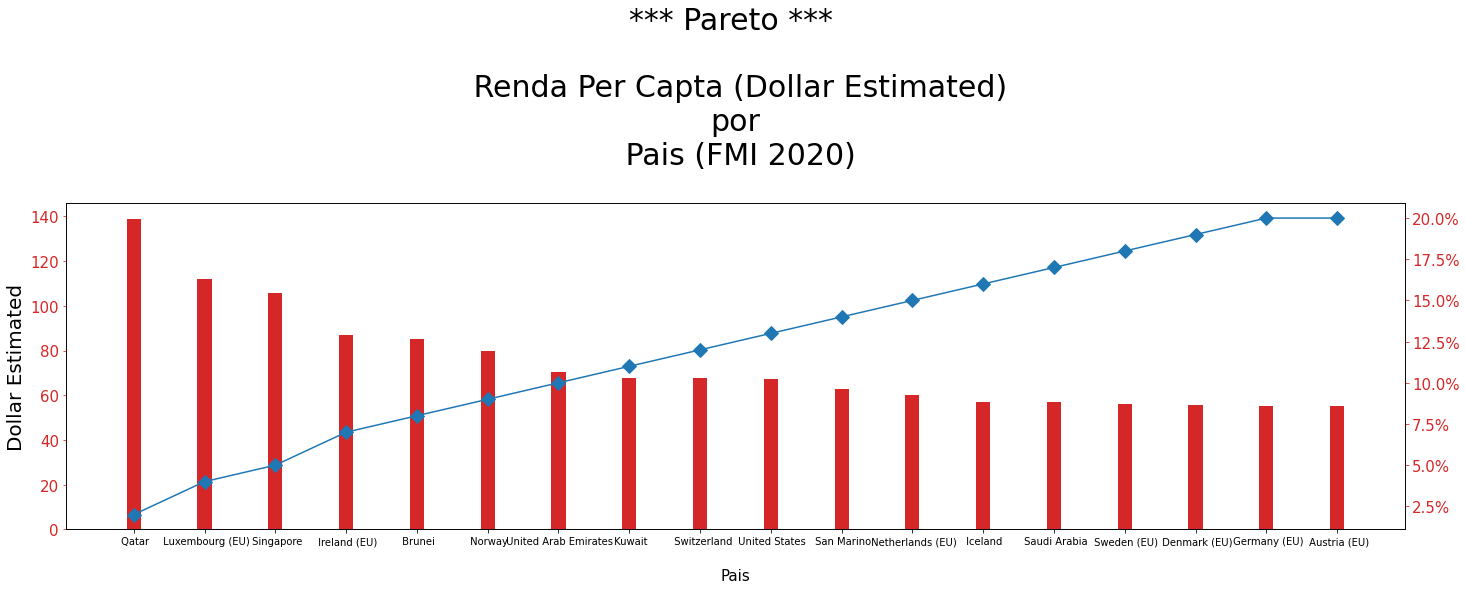

In [144]:
gdp = gdp_filtrado
gdp.index = gdp['Country']
gdp = gdp.sort_values(by='Dollar Estimated',ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(24,6)
ax.bar(gdp.index, gdp["Dollar Estimated"], color="C3",width=0.2) # red

ax2 = ax.twinx()
ax2.plot(gdp.index, gdp['GDP Percentual'], color="C0", marker="D", ms=10) # Blue
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_ylabel('Dollar Estimated', fontsize = 20) # ylabel
ax.set_xlabel('\nPais', fontsize = 15) # xlabel

ax.tick_params(axis="y", colors="C3",labelsize=15)
ax2.tick_params(axis="y", colors="C3",labelsize=15)

ax.tick_params(axis='x', labelsize=10) # labels no eixo x

plt.title('*** Pareto *** \n\n Renda Per Capta (Dollar Estimated)\npor\n Pais (FMI 2020)\n', fontdict = {'fontsize' : 30})
plt.show()

## Observação:
## Quando o indicador foi criado, a desigualdade era enorme e poucos países respondiam pela riquesa mundial. O gráfico acima, demonstra que entre 185 países, menos de 20 concentram 20% da riquesa. Porém, segundo o FMI, são economias em países considerados Paraisos Fiscais, onde o dinheiro não é declarado publicamente quanto a origem.
## FMI
### A stunning $12 trillion—almost 40 percent of all foreign direct investment positions globally—is completely artificial: it consists of financial investment passing through empty corporate shells with no real activity. These investments in empty corporate shells almost always pass through well-known tax havens. The eight major pass-through economies—the Netherlands, Luxembourg, Hong Kong SAR, the British Virgin Islands, Bermuda, the Cayman Islands, Ireland, and Singapore—host more than 85 percent of the world’s investment in special purpose entities, which are often set up for tax reasons.

— "Piercing the Veil", International Monetary Fund, June 2018[6]

# **Aplicando Pareto numa Empresa**

## We can apply the 80/20 rule to almost anything:

###- 80% of customer complaints arise from 20% of your products and services.
###- 80% of delays in the schedule result from 20% of the possible causes of the delays.
###- 20% of your products and services account for 80% of your profit.
###- 20% of your sales force produces 80% of your company revenues.
###- 20% of a systems defects cause 80% of its problems.

## Tipo de Defeitos na Linha de Produção



In [145]:
df1 = pd.read_csv("/content/pareto1.csv",encoding="utf-8", decimal=',' )

In [146]:
df1.columns

Index(['Tipo Defeito', 'Contagem de Defeitos', 'Custo Retrabalho por Unidade',
       'Custo Total Retrabalho'],
      dtype='object')

In [147]:
df2 = df1.cumsum()
df2

,Tipo Defeito,Contagem de Defeitos,Custo Retrabalho por Unidade,Custo Total Retrabalho
0,Riscos,201,21.33,4287.33
1,RiscosManchas,279,52.40,6710.79
2,RiscosManchasDobras,326,76.20,7829.39
3,RiscosManchasDobrasFuros,357,364.80,16775.99
4,RiscosManchasDobrasFurosRasgos,372,489.07,18640.04


In [148]:
df2.columns

Index(['Tipo Defeito', 'Contagem de Defeitos', 'Custo Retrabalho por Unidade',
       'Custo Total Retrabalho'],
      dtype='object')

In [149]:
df2 = df1.cumsum()
df2['Tipo Defeito'] = df1['Tipo Defeito']
df2['Contagem Defeitos Acumulados'] = df2['Contagem de Defeitos']
df2['Contagem de Defeitos'] = df1['Contagem de Defeitos']
df2.sort_values(by='Contagem de Defeitos', inplace=True, ascending=False)   


In [150]:
df2

,Tipo Defeito,Contagem de Defeitos,Custo Retrabalho por Unidade,Custo Total Retrabalho,Contagem Defeitos Acumulados
0,Riscos,201,21.33,4287.33,201
1,Manchas,78,52.40,6710.79,279
2,Dobras,47,76.20,7829.39,326
3,Furos,31,364.80,16775.99,357
4,Rasgos,15,489.07,18640.04,372


In [151]:
#df2.plot(x='Tipo Defeito', y='Contagem de Defeitos', kind='bar', grid=True ,title="Tipo Defeito\nvs\nContagem de Defeitos\n\n", rot=30);


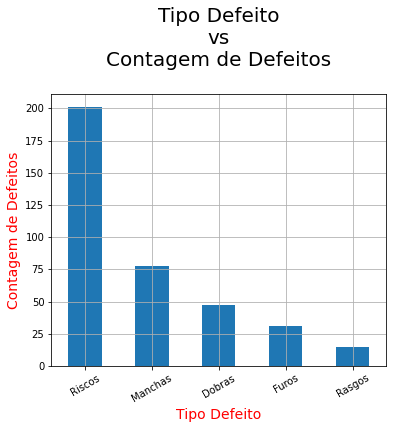

In [152]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
fig.set_size_inches(6,5)
# make a plot
df2.index = df2['Tipo Defeito']
#ax.plot(df2['Total Nao Conformidades'], df2['Tipo Nao Conformidade'], color="red", marker="o")
ax = df2['Contagem de Defeitos'].plot(kind='bar', grid=True, rot=30);
#
# set x-axis label
ax.set_xlabel("Tipo Defeito",color='red',fontsize=14)
# set y-axis label
ax.set_ylabel("Contagem de Defeitos",color="red",fontsize=14);
#
plt.title('Tipo Defeito\nvs\nContagem de Defeitos\n', fontdict = {'fontsize' : 20});

In [153]:
df2['Percentual Defeitos'] = df2['Contagem Defeitos Acumulados']/df2['Contagem Defeitos Acumulados'].max()
#
df2['Percentual Defeitos']= round(df2['Percentual Defeitos']*100,0).astype(int)

In [154]:
df2

,Tipo Defeito,Contagem de Defeitos,Custo Retrabalho por Unidade,Custo Total Retrabalho,Contagem Defeitos Acumulados,Percentual Defeitos
Tipo Defeito,,,,,,
Riscos,Riscos,201,21.33,4287.33,201,54
Manchas,Manchas,78,52.40,6710.79,279,75
Dobras,Dobras,47,76.20,7829.39,326,88
Furos,Furos,31,364.80,16775.99,357,96
Rasgos,Rasgos,15,489.07,18640.04,372,100


In [155]:
#df2.plot(x='Tipo Defeito', y='Percentual Defeitos', kind='line',title="Tipo Defeito\nvs\nPercentual Defeitos\n\n", rot=30, grid=True);


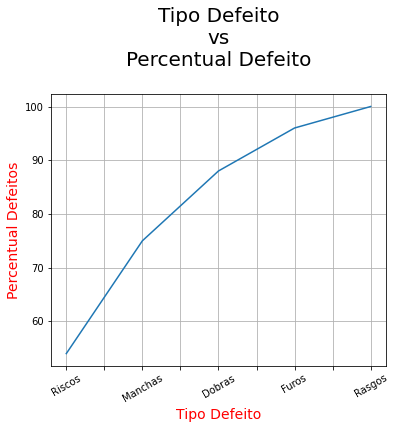

In [156]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
fig.set_size_inches(6,5)
# make a plot
df2.index = df2['Tipo Defeito']
#ax.plot(df2['Total Nao Conformidades'], df2['Tipo Nao Conformidade'], color="red", marker="o")
ax = df2['Percentual Defeitos'].plot(kind='line', grid=True, rot=30);

# set x-axis label
ax.set_xlabel("Tipo Defeito",color='red',fontsize=14)
# set y-axis label
ax.set_ylabel("Percentual Defeitos",color="red",fontsize=14);
#
plt.title('Tipo Defeito\nvs\nPercentual Defeito\n', fontdict = {'fontsize' : 20});

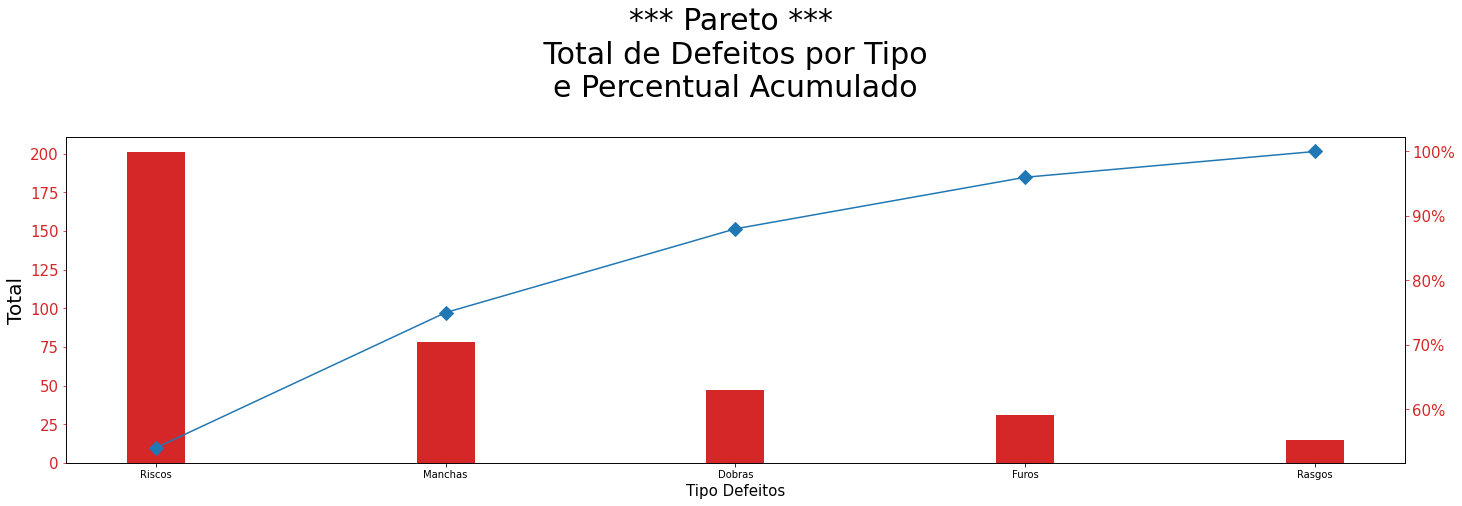

In [157]:
df2.index = df2['Tipo Defeito']
df2 = df2.sort_values(by='Contagem de Defeitos',ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(24,6)
ax.bar(df2.index, df2["Contagem de Defeitos"], color="C3",width=0.2) # red

ax2 = ax.twinx()
ax2.plot(df2.index, df2['Percentual Defeitos'], color="C0", marker="D", ms=10) # Blue
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_ylabel('Total', fontsize = 20) # ylabel
ax.set_xlabel('Tipo Defeitos', fontsize = 15) # xlabel

ax.tick_params(axis="y", colors="C3",labelsize=15)
ax2.tick_params(axis="y", colors="C3",labelsize=15)

ax.tick_params(axis='x', labelsize=10) # labels no eixo x

plt.title('*** Pareto *** \n Total de Defeitos por Tipo \ne Percentual Acumulado\n', fontdict = {'fontsize' : 30})
plt.show()

## Problemas numa Página de Internet

In [158]:
df3 = pd.read_csv("/content/pareto-analysis.csv")

In [159]:
df3.columns

Index(['Error (Cause)', 'Count', 'Cumulative Count', 'Cumulative %'], dtype='object')

In [160]:
df3.drop(['Cumulative Count','Cumulative %'], inplace=True, axis=1)

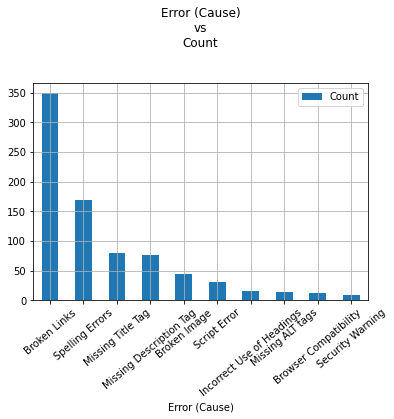

In [161]:
df3 = df3.sort_values(ascending=False, by='Count')
df3.plot(x='Error (Cause)', y='Count',title="Error (Cause)\nvs\nCount\n\n", grid=True,rot=40, kind='bar');

In [162]:
df4 = df3.cumsum()
df4['Cumulative Count'] = df4['Count']
df4['Count'] = df3['Count']
df4['Error (Cause)'] = df3['Error (Cause)']
df4

,Error (Cause),Count,Cumulative Count
0,Broken Links,349,349
1,Spelling Errors,169,518
2,Missing Title Tag,79,597
3,Missing Description Tag,77,674
4,Broken Image,45,719
5,Script Error,30,749
6,Incorrect Use of Headings,15,764
7,Missing ALT tags,14,778
8,Browser Compatibility,12,790
9,Security Warning,9,799


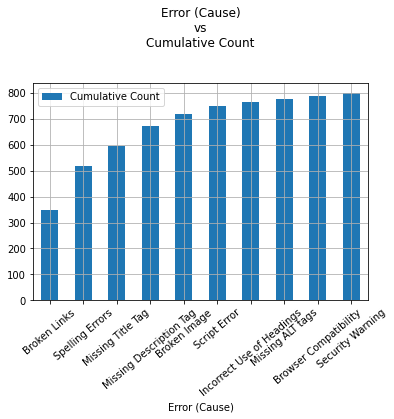

In [163]:
df4.plot(x='Error (Cause)', y='Cumulative Count',title="Error (Cause)\nvs\nCumulative Count\n\n", grid=True,rot=40, kind='bar');

In [164]:
df4['Percentual Error'] = df4['Cumulative Count']/df4['Cumulative Count'].max()
#
df4['Percentual Error']= round(df4['Percentual Error']*100,0).astype(int)

In [165]:
df4['Error (Cause)'] = df4['Error (Cause)'].str.upper()
df4

,Error (Cause),Count,Cumulative Count,Percentual Error
0,BROKEN LINKS,349,349,44
1,SPELLING ERRORS,169,518,65
2,MISSING TITLE TAG,79,597,75
3,MISSING DESCRIPTION TAG,77,674,84
4,BROKEN IMAGE,45,719,90
5,SCRIPT ERROR,30,749,94
6,INCORRECT USE OF HEADINGS,15,764,96
7,MISSING ALT TAGS,14,778,97
8,BROWSER COMPATIBILITY,12,790,99
9,SECURITY WARNING,9,799,100


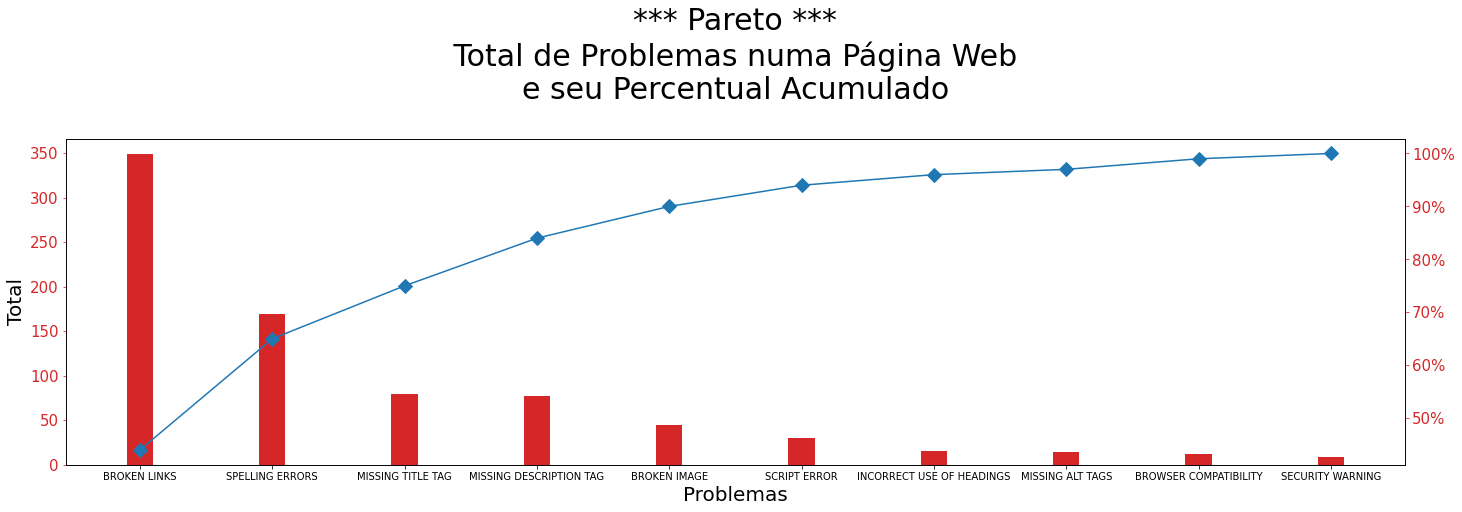

In [166]:
df4.index = df4['Error (Cause)']
df4 = df4.sort_values(by='Count',ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(24,6)
ax.bar(df4.index, df4["Count"], color="C3",width=0.2) # red

ax2 = ax.twinx()
ax2.plot(df4.index, df4['Percentual Error'], color="C0", marker="D", ms=10) # Blue
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_ylabel('Total', fontsize = 20) # ylabel
ax.set_xlabel('Problemas', fontsize = 20) # xlabel

ax.tick_params(axis="y", colors="C3",labelsize=15)
ax2.tick_params(axis="y", colors="C3",labelsize=15)

ax.tick_params(axis='x', labelsize=10) # labels no eixo x

plt.title('*** Pareto ***\n Total de Problemas numa Página Web \ne seu Percentual Acumulado\n', fontdict = {'fontsize' : 30})
plt.show()


# 80/20
## Em meio a tantas opções em nossos celulares, usamos apenas um grupo de funções, esse grupo responde por 80% do uso diário.
## Quando o olhamos o que falta estudar para dominar determinado assunto, vemos que certos tópicos são a base de quase tudo que usamos no dia-dia.
## Assim fica claro que se focarmos naquilo que realmente importa podemos ter ganhos satisfatórios ao longo do planejamento.
# Medium - Pareto aplicado no estudo de Data Science:
- https://medium.com/@taylor.mark110/why-the-pareto-principle-should-guide-your-data-science-career-c6991b1b8c6f

# More About Pareto:
- https://www.projectsmart.co.uk/pareto-analysis-step-by-step.php
- https://www.kdnuggets.com/2019/03/pareto-principle-data-scientists.html
- https://tallyfy.com/pareto-chart-analysis/
- https://www.it-swarm-pt.tech/pt/python/como-fazer-pareto-chart-em-python/808336014/